<a href="https://colab.research.google.com/github/ranu-agrawal/MLnow_2.0/blob/main/02_ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


`Exploratory Data Analysis`

[Link to Download the dataset](https://www.kaggle.com/jessemostipak/hotel-booking-demand/download)

**Date Created**: Jun 10, 2021


**Author**:
 Ranu Agrawal

 **Mentor**: Shivani Shimpi

**Reach out**:
[GitHub](https://github.com/ranu-agrawal) | [LinkedIn](https://www.linkedin.com/in/ranu-agrawal/)



Feel free to check out my [website](http://ranu-agrawal.netlify.app) for more information about me

#Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/hotel'

/content/drive/MyDrive/hotel


In [3]:
ls

ExploratoryDataAnalysis.ipynb  univariate_MathData_2.csv
hotel_bookings.csv             Untitled0.ipynb


In [29]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [30]:
mathData = pd.read_csv('hotel_bookings.csv') #load the csv file as dataframe

In [31]:
mathData.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,0.0,0,BB,DEU,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,0.0,0,BB,JPN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,0.0,0,BB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [32]:
mathData.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


#Data Processing

Categorical to numeric value conversion

In [33]:
#unique classes/categories in every column 

print(f'hotel: {mathData.hotel.unique()}')
print(f'arrival_date_year: {mathData.arrival_date_year.unique()}')
print(f'adults: {mathData.adults.unique()}')
print(f'reserved_room_type: {mathData.reserved_room_type.unique()}')
print(f'assigned_room_type: {mathData.assigned_room_type.unique()}')

hotel: ['Resort Hotel' 'City Hotel']
arrival_date_year: [2015 2016 2017]
adults: [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
reserved_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
assigned_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


In [34]:
#convert the categories into numbers 

#binary valued 

mathData['hotel'] = mathData['hotel'].apply({'Resort Hotel':1, 'City Hotel':0}.get)

#multi-valued
mathData['reserved_room_type'] = mathData['reserved_room_type'].apply({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8, 'P':12, 'L':11}.get)
mathData['assigned_room_type'] = mathData['assigned_room_type'].apply({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8, 'I':9, 'K':10, 'L':11, 'P':12}.get)

mathData.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,3,3,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,3,3,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,1,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,1,3,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,1,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,1,1,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,1,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,1,1,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,1,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,1,1,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,1,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,3,3,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,1,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,3,3,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,1,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,1,1,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,1,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,4,4,0,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [35]:
mathData = mathData[['hotel', 'reserved_room_type', 'assigned_room_type']]

In [36]:
mathData.head(10)

,hotel,reserved_room_type,assigned_room_type
0,1,3,3
1,1,3,3
2,1,1,3
3,1,1,1
4,1,1,1
5,1,1,1
6,1,3,3
7,1,3,3
8,1,1,1
9,1,4,4


In [21]:
mathData.to_csv('cleanedMathData.csv')

In [22]:
ls

cleanedMathData.csv            Univariate_LinearRegression.ipynb
ExploratoryDataAnalysis.ipynb  univariate_MathData_2.csv
hotel_bookings.csv


#Data visualization

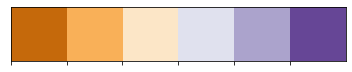

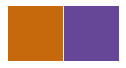

In [23]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [24]:
print(f'''There are {len(mathData.columns)} columns in the dataframe mathData namely,

{mathData.columns}''') #columns in the dataframe

There are 3 columns in the dataframe mathData namely,

Index(['hotel', 'reserved_room_type', 'assigned_room_type'], dtype='object')


A pairplot is a plot where the x axis and y axis will have all the columns you specify it with.

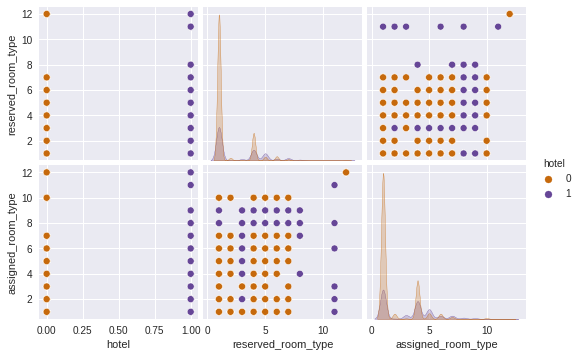

In [38]:
#pairplot for all the values

sns.pairplot(mathData,
             x_vars = ['hotel', 'reserved_room_type', 'assigned_room_type'],
             y_vars =  ['reserved_room_type', 'assigned_room_type'],
       diag_kind='kde', hue='hotel'
             )

`stripplot` --> Plotting a graph

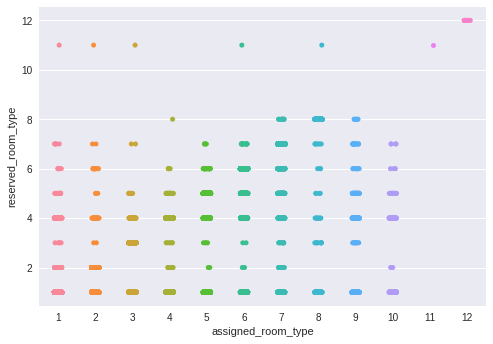

In [39]:
sns.stripplot(y='reserved_room_type', x='assigned_room_type', data=mathData)

Plotting mulitple graphs together

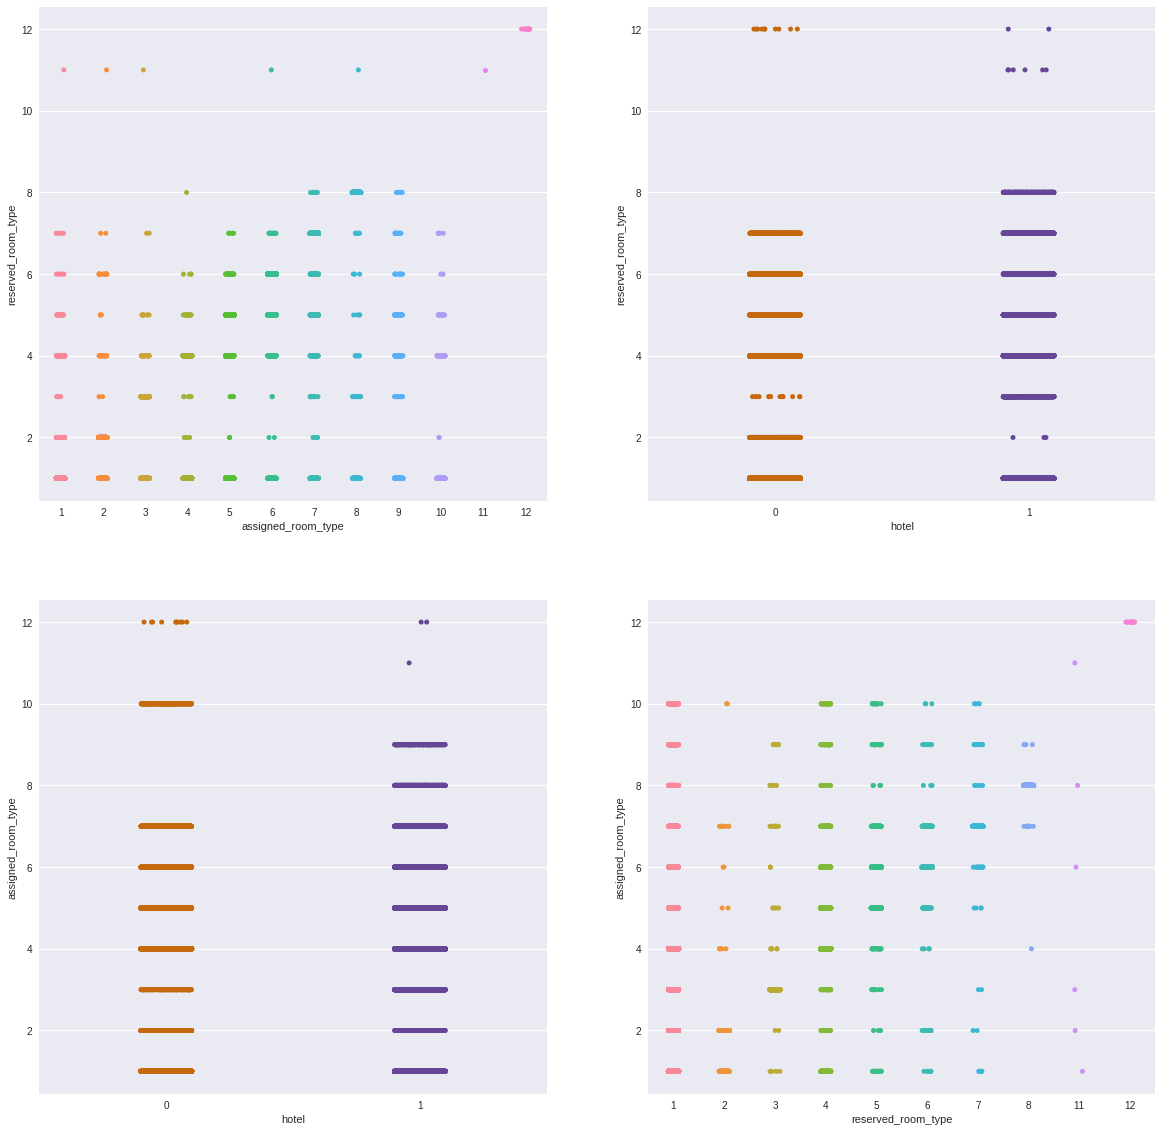

In [43]:
# stripplots plotted as subplots on one main plot with the ax parameter

fig, axarr = plt.subplots(2,2, figsize=(20,20))

#two rows and 2 columns all starting from (0,0)

sns.stripplot(y='reserved_room_type', x='assigned_room_type', data=mathData, hue=None, ax=axarr[0][0])
sns.stripplot(y='reserved_room_type', x='hotel', data=mathData, hue=None, ax=axarr[0][1])
sns.stripplot(y='assigned_room_type', x='hotel', data=mathData, hue=None, ax=axarr[1][0])
sns.stripplot(y='assigned_room_type', x='reserved_room_type', data=mathData, hue=None, ax=axarr[1][1])

#Data Splits

In [44]:
trainDataset = mathData.sample(frac=0.8, random_state=0) 
testDataset = mathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

        hotel  reserved_room_type  assigned_room_type
5627        1                   1                   1
119322      0                   1                   1
75310       0                   1                   1
90032       0                   4                   4
75368       0                   1                   1
    hotel  reserved_room_type  assigned_room_type
2       1                   1                   3
10      1                   5                   5
13      1                   7                   7
20      1                   6                   6
21      1                   1                   1


In [45]:
print(trainDataset.shape)
print(testDataset.shape)

(95512, 3)
(23878, 3)


In [46]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

        hotel  reserved_room_type  assigned_room_type
5627        1                   1                   1
119322      0                   1                   1
75310       0                   1                   1
90032       0                   4                   4
75368       0                   1                   1
    hotel  reserved_room_type  assigned_room_type
2       1                   1                   3
10      1                   5                   5
13      1                   7                   7
20      1                   6                   6
21      1                   1                   1


In [47]:
#removing the "assigned_room_type" column and saving it into the labels variable

trainLabels = trainFeatures.pop('assigned_room_type')
testLabels = testFeatures.pop('assigned_room_type')

print(trainLabels.head())
print(testLabels.head())

5627      1
119322    1
75310     1
90032     4
75368     1
Name: assigned_room_type, dtype: int64
2     3
10    5
13    7
20    6
21    1
Name: assigned_room_type, dtype: int64


In [48]:
print(trainFeatures.head())
print(testFeatures.head())

        hotel  reserved_room_type
5627        1                   1
119322      0                   1
75310       0                   1
90032       0                   4
75368       0                   1
    hotel  reserved_room_type
2       1                   1
10      1                   5
13      1                   7
20      1                   6
21      1                   1


In [49]:
print(testFeatures.shape)

(23878, 2)
